<a href="https://colab.research.google.com/github/MJAHMADEE/Industrial_Control_Course/blob/main/World_of_Linearization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Step Response of a Gravity Drained Tank


## 3.1.1 Summary

In the example we show how to fit the step response of a nonlinear system, a gravity drained tank, to a first order linear system.

## 3.1.2 Mass Balance for Tank with Constant Cross-Sectional Area

For a tank with constant cross-sectional area, such as a cylindrical or rectangular tank, the liquid height is described by a differential equation

$$A\frac{dh}{dt} = q_{in}(t) - q_{out}(t)$$

where $q_{out}$ is a function of liquid height. Torricelli's law tells the outlet flow from the tank is proportional to square root of the liquid height

$$ q_{out}(h) = C_v\sqrt{h} $$

Dividing by area we obtain a nonlinear ordinary differential equation 

$$ \frac{dh}{dt} = - \frac{C_V}{A}\sqrt{h} + \frac{1}{A}q_{in}(t) $$

in our standard form where the LHS derivative appears with a constant coefficient of 1.

## 3.1.3 Nonlinear Step Response

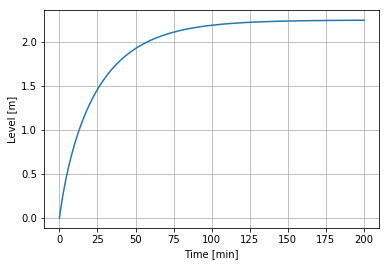

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

Cv  = 0.1     # Outlet valve constant [cubic meters/min/meter^1/2]
A   = 1.0     # Tank area [meter^2]

# inlet flow rate in cubic meters/min
def qin(t):
    return 0.15

def deriv(h,t):
    return qin(t)/A - Cv*np.sqrt(h)/A

IC = [0.0]
t = np.linspace(0,200,101)
h = odeint(deriv,IC,t)

plt.plot(t,h)

plt.xlabel('Time [min]')
plt.ylabel('Level [m]')
plt.grid();

## 3.1.4 Linear Approximation of the Step Response

The step response of the gravity drained to a change in flowrate looks similar to the step response of a firat order linear system. Let's try a linear approximation

$$\tau\frac{dx}{dt} + x = Ku$$

which has a step response solution that can be written

$$x(t) = x_{ss} + (x_0 - x_{ss})\exp(-t/\tau)$$

where $x_{ss} = Ku_{ss}$. There are two parameters, $K$ and $\tau$, which we need to estimate in order to fit the linear approximation to the nonlinear simulation results computed above.

### 3.1.4.1 Fit for $K$

The steady state gain $K$ of the linear system is given by

$$ K = \frac{x_{ss} - x(0)}{u_{ss} - u_0}$$

where $u_0$ is the initial input, $u_{ss}$ is the steady-state input, and $x_0$ and $x_{ss}$ are corresponding values of the state variable. In the case of liquid level, $h\sim x$ and $q_{in}\sim u$, therefore an estimate of $K$ is 

$$ K = \frac{h_{ss} - h_0}{q_{in,ss} - q_{in,0}}$$

In [ ]:
q0,h0 = 0,0            # initial conditions
qss = qin(t[-1])       # final input
hss = h[-1]            # python way to get the last element in a list

K = (hss-h0)/(qss-q0)  # step change in output divided by step change in input
print('Steady-State Gain is approximately = ', K)

Steady-State Gain is approximately =  [ 14.98595148]


### 3.1.4.2 Fit for $\tau$

From the formula for the solution of a first-order linear equation with constant input,

$$\frac{x_{ss} - x(t)}{x_{ss} - x_0} = \exp(-t/\tau) \qquad \implies \qquad \tau = \frac{-t}{\ln\frac{x_{ss} - x(t)}{x_{ss} - x_0}}$$

We pick one point representative of the transient portion of the nonlinear response. In this case the response at $t = 25$ minutes accounts for $\approx$60% of the ultimate response, so we choose point as a representative point.

In [ ]:
k = sum(t<25)        # find index in t corresponding to 25 minutes
tk = t[k]
hk = h[k]

tau = -tk/np.log((hss-hk)/(hss-h0))
print('Estimated time constant is ', tau)

Estimated time constant is  [ 23.92271579]


### 3.1.4.3 Comparing the linear approximation to the nonlinear simulation

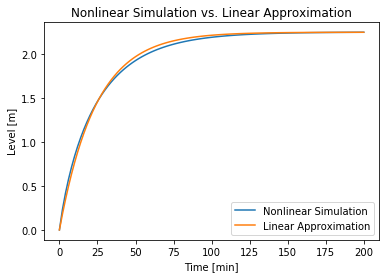

In [ ]:
u0 = q0
uss = qss

xss = K*(uss - u0)
xpred = xss - xss*np.exp(-t/tau)

plt.plot(t,h)
plt.plot(t,xpred)
plt.legend(['Nonlinear Simulation','Linear Approximation'])
plt.xlabel('Time [min]')
plt.ylabel('Level [m]')
plt.title('Nonlinear Simulation vs. Linear Approximation');

# 3.2 Linear Approximation of a Process Model

## 3.2.1 Key Idea

Process models usually exhibit some form of non-linearity due to the multiplication of an extensive flowrate and an intensive thermodynamic state variable, chemical kinetics, or various types of transport phenomenon. Near a steady-state, however, an approximate linear models often provide a 'good-enough' dynamical model for control design and analysis. Here we show how a linear approximation is constructed using a Taylor series expansion.

## 3.2.2 Why is this Important?

As we will learn later in this course, linear models are amenable to control design and analysis. For process systems that will be operated near a steady-state, linear models provide a useful framework for control design.

## 3.2.3 Procedure for a Single Variable System

We start with a process model that consists of a single first-order
ordinary differential equation of the form

$$\frac{dh}{dt}=f(h,q)$$

where $h$ is the state variable and $q$ is an input variable. Choose
a nominal value for the process input $q$, we'll call this nominal
value $\bar{q}$. The following procedure will produce a linear approximate
valid near the steady-state.

### 3.2.3.1 Step 1.  Find a Nominal Steady State Operating Condition
Find the steady-state value of $h$ by solving

$$0=f(\bar{h},\bar{q})$$

where $\bar{q}$ is a nominal (i.e, typical, or desired value) of a manipulated process variable.

### 3.2.3.2 Step 2. Define deviation variables
\begin{eqnarray*}
x & = & h-\bar{h}\\
u & = & q-\bar{q}
\end{eqnarray*}

### 3.2.3.3 Step 3. Taylor Series Expansion
Compute the first terms in the Taylor series and evaluate at steady-state. The higher-order terms are not needed provided the lower-order terms are non-zero and the deviations are small.
$$
f(\bar{h}+x,\bar{q}+u)\approx f(\bar{h},\bar{q})+\left.\frac{\partial f}{\partial h}\right|_{\bar{h},\bar{q}}x+\left.\frac{\partial f}{\partial q}\right|_{\bar{h},\bar{q}}u+\cdots
$$

### 3.2.3.4 Step 4. Linear Approximation
The linear approximation is 
$$
\frac{dx}{dt}=\underbrace{\left.\frac{\partial f}{\partial h}\right|_{\bar{h},\bar{q}}}_{a}x+\underbrace{\left.\frac{\partial f}{\partial q}\right|_{\bar{h},\bar{q}}}_{b}u
$$

### 3.2.3.5 Example: Gravity Drained Tank

A simple model for the liquid height in a gravity-drained tank with cross-sectional area $A$ is 

$$A\frac{dh}{dt}=q_{in}-C\sqrt{h}$$

where $q_{in}$ is a volumetric inflow and $C$ is a constant associated with the drain. This is a non-linear process model that can be written

$$\frac{dh}{dt}=f(h,q_{in})$$

where

$$f(h,q_{in})=\frac{1}{A}\left(q_{in}-C\sqrt{h}\right)$$

Given a nominal inlet flowrate $\bar{q}_{in}$, the steady state value of $h$, that is $\bar{h}$, is found by solving the steady state equation

$$0=f(\bar{h},\bar{q}_{in})=\frac{1}{A}\left(\bar{q}_{in}-C\sqrt{\bar{h}}\right)$$

which gives 

$$\bar{h}=\frac{\bar{q}_{in}^{2}}{C^{2}}$$

It's interesting to note the steady-state height of the liquid in a gravity-drained tank is proportional to the square of the nominal flowrate. A 50\% increase in flowrate more than doubles the liquid height.

Let $x$ and $u$ represent the deviations from steady-state

\begin{eqnarray*}
x & = & h-\bar{h}\\
u & = & q-\bar{q}
\end{eqnarray*}

Then

\begin{eqnarray*}
\frac{d(\bar{h}+x)}{dt} & = & \frac{1}{A}\left(\bar{q}_{in}+u-C\sqrt{\bar{h}+x}\right)
\end{eqnarray*}

The Taylor series expansion 

$$f(\bar{h}+x,\bar{q}_{in}+u)\approx f(\bar{h},\bar{q}_{in})+\left.\frac{\partial f}{\partial h}\right|_{\bar{h},\bar{q}}x+\left.\frac{\partial f}{\partial q}\right|_{\bar{h},\bar{q}}u+\frac{1}{2}\left.\frac{\partial^{2}f}{\partial h^{2}}\right|_{\bar{h}}x^{2}\cdots$$

For this example 

$$\frac{dx}{dt}=\left(-\frac{C}{2A\sqrt{\bar{h}}}\right)x+\left(\frac{1}{A}\right)u$$

An alternative form of the model is found by substituting the solution for $\bar{h}$. While these have somewhat different analytical expressions for a given application they will yield identical numerical results.

$$\frac{dx}{dt}=\left(-\frac{C^{2}}{2A\bar{q}_{in}}\right)x+\left(\frac{1}{A}\right)u$$

How well does this approximation work? 

This question can be answered by comparing the results of two simulations. In the first case the simulation consists of integrating 

$$A\frac{dh}{dt}=q_{in}-C\sqrt{h}$$

as shown in the graph below. 

where $A=1$, $C=2$, initial condition $h(0)=0$, and a constant input $q_{in}=\bar{q}_{in}=1$. For these parameter values, the approximate linear model for the deviation from steady-state is given by

\begin{eqnarray*}
\frac{dx}{dt} & = & \left(-\frac{C^{2}}{2A\bar{q}_{in}}\right)x+\left(\frac{1}{A}\right)u\\
\\
 & = & -2\,x+u
\end{eqnarray*}

In terms of deviations from steady state, the input $u=q_{in}-\bar{q}_{in}=0$ and the initial conditionis $x(0)=h(0)-\bar{h}=-\bar{h}$. Plotting $h(t)$ and $x(t)+\bar{h}$ on the same axis produces the results shown in Figure \ref{fig:LinearApproximation}. 



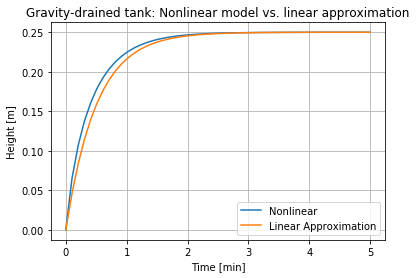

In [ ]:
#Simulation of a Gravity-Drained Tank

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# parameter values
qin = 1
A = 1
C = 2

# steady state
hbar = (qin/C)**2

# nonlinear simulation
def hdot(h,t):
    return (qin - C*np.sqrt(h))/A

t = np.linspace(0,5)
h = odeint(hdot,[0],t)

# linear approximation
a = -C**2/2/A/qin
b = 1/A

def xdot(x,t):
    return a*x + b*u

u = 0
x = odeint(xdot,[-hbar],t)

# visualization
plt.plot(t,h)
plt.plot(t,x+hbar)
plt.legend(['Nonlinear','Linear Approximation'],loc='lower right')
plt.xlabel('Time [min]')
plt.ylabel('Height [m]')
plt.title('Gravity-drained tank: Nonlinear model vs. linear approximation')
plt.grid()

### 3.2.3.6 Exercises

**1.** Suppose you have a tank with an cross-sectional area of 1 square meter, a steady inlet flow $\bar{q}_{in}=10$ liters/min, and observe a liquid height of 0.5 meters. What is the constant $C$? What is the characteristic time constant for the tank?

**2.** You have an elementary reaction 

$$2{\cal A}\longrightarrow Products$$

carried out under isothermal conditions in a stirred tank of volume $V$. The reaction rate is given by the expression 

$$R_{A}=k_{A}C_{A}^{2}$$

and the inlet concentration to the tank is $C_{A,in}$ at flowrate $q$. Construct a linear approximation for the dynamics of this process in the neighborhood of a steady state.

# 3.3 Linear Approximation of a Multivariable Model

## 3.3.1 Multivariable Systems

Most process models consist of more than a single state and a single input. Techniques for linearization extend naturally to multivariable systems. The most convenient mathematical tools involve some linear algebra.

### 3.3.1.1 Example: Gravity Drained Tanks

Here we develop a linear approximation to a process model for a system consisting of coupled gravity-drained tanks. 

![Gravity Drained Tanks](figures/GravityDrainedTanks.png)

#### 3.3.1.1.1 Model

\begin{eqnarray*}
A_{1}\frac{dh_{1}}{dt} & = & q_{in}-C_{1}\sqrt{h_{1}}\\
A_{2}\frac{dh_{2}}{dt} & = & q_{d}+C_{1}\sqrt{h_{1}}-C_{2}\sqrt{h_{2}}
\end{eqnarray*}

#### 3.3.1.1.2 Nominal Inputs

\begin{eqnarray*}
\bar{q}_{in} & = & \bar{q}_{in}\\
\bar{q}_{d} & = & 0
\end{eqnarray*}

#### 3.3.1.1.3 Steady State for nominal input

\begin{eqnarray*}
\bar{h}_{1} & = & \frac{\bar{q}_{in}^{2}}{C_{1}^{2}}\\
\bar{h}_{2} & = & \frac{\bar{q}_{in}^{2}}{C_{2}^{2}}
\end{eqnarray*}

#### 3.3.1.1.4 Deviation Variables

States

\begin{eqnarray*}
x_{1} & = & h_{1}-\bar{h}_{1}\\
x_{2} & = & h_{2}-\bar{h}_{2}
\end{eqnarray*}

Control input
$$u=q_{in}-\bar{q}_{in}$$

Disturbance input
$$d=q_{d}-\bar{q}_{d}$$

Measured output
$$y=h_{2}-\bar{h}_{2}$$

#### 3.3.1.1.5 Linearization 

\begin{eqnarray*}
\frac{dh_{1}}{dt} & = & \frac{1}{A_{1}}\left(q_{in}-C_{1}\sqrt{h_{1}}\right)=f_{1}(h_{1},h_{2},q_{in},q_{d})\\
\frac{dh_{2}}{dt} & = & \frac{1}{A_{2}}\left(q_{d}+C_{1}\sqrt{h_{1}}-C_{2}\sqrt{h_{2}}\right)=f_{2}(h_{1},h_{2},q_{in},q_{d})
\end{eqnarray*}

Taylor series expansion for the first tank

\begin{eqnarray*}
\frac{dx_{1}}{dt} & = & f_{1}(\bar{h}_{1}+x_{1},\bar{h}_{2}+x_{2},\bar{q}_{in}+u,\bar{q}_{d}+d)\\
 & \approx & \underbrace{f_{1}(\bar{h}_{1},\bar{h}_{2},\bar{q}_{in})}_{0}+\left.\frac{\partial f_{1}}{\partial h_{1}}\right|_{SS}x_{1}+\left.\frac{\partial f_{1}}{\partial h_{2}}\right|_{SS}x_{2}+\left.\frac{\partial f_{1}}{\partial q_{in}}\right|_{SS}u+\left.\frac{\partial f_{1}}{\partial q_{d}}\right|_{SS}d\\
 & \approx & \left(-\frac{C_{1}}{2A_{1}\sqrt{\bar{h}_{1}}}\right)x_{1}+\left(0\right)x_{2}+\left(\frac{1}{A_{1}}\right)u+\left(0\right)d\\
 & \approx & \left(-\frac{C_{1}^{2}}{2A_{1}\bar{q}_{in}}\right)x_{1}+\left(\frac{1}{A_{1}}\right)u
\end{eqnarray*}

Taylor series expansion for the second tank

\begin{eqnarray*}
\frac{dx_{2}}{dt} & = & f_{2}(\bar{h}_{1}+x_{1},\bar{h}_{2}+x_{2},\bar{q}_{in}+u,\bar{q}_{d}+d)\\
 & \approx & \underbrace{f_{2}(\bar{h}_{1},\bar{h}_{2},\bar{q}_{in})}_{0}+\left.\frac{\partial f_{2}}{\partial h_{1}}\right|_{SS}x_{1}+\left.\frac{\partial f_{2}}{\partial h_{2}}\right|_{SS}x_{2}+\left.\frac{\partial f_{2}}{\partial q_{in}}\right|_{SS}u+\left.\frac{\partial f_{2}}{\partial q_{d}}\right|_{SS}d\\
 & \approx & \left(\frac{C_{1}}{2A_{2}\sqrt{\bar{h}_{1}}}\right)x_{1}+\left(-\frac{C_{2}}{2A_{2}\sqrt{\bar{h}_{2}}}\right)x_{2}+\left(0\right)u+\left(\frac{1}{A_{2}}\right)d\\
 & \approx & \left(\frac{C_{1}^{2}}{2A_{2}\bar{q}_{in}}\right)x_{1}+\left(-\frac{C_{2}^{2}}{2A_{2}\bar{q}_{in}}\right)x_{2}+\left(\frac{1}{A_{2}}\right)d
\end{eqnarray*}

Measured outputs

\begin{eqnarray*}
y & = & h_{2}-\bar{h}_{2}\\
 & = & x_{2}
\end{eqnarray*}

#### 3.3.1.1.6 Summary of the linear model using matrix/vector notation

\begin{eqnarray*}
\frac{d}{dt}\left[\begin{array}{c}
x_{1}\\
x_{2}
\end{array}\right] & = & \left[\begin{array}{cc}
-\frac{C_{1}^{2}}{2A_{1}\bar{q}_{in}} & 0\\
\frac{C_{1}^{2}}{2A_{2}\bar{q}_{in}} & -\frac{C_{2}^{2}}{2A_{2}\bar{q}_{in}}
\end{array}\right]\left[\begin{array}{c}
x_{1}\\
x_{2}
\end{array}\right]+\left[\begin{array}{c}
\frac{1}{A_{1}}\\
0
\end{array}\right]u+\left[\begin{array}{c}
0\\
\frac{1}{A_{2}}
\end{array}\right]d\\
y & = & \left[\begin{array}{cc}
0 & 1\end{array}\right]\left[\begin{array}{c}
x_{1}\\
x_{2}
\end{array}\right]+\left[\begin{array}{c}
0\end{array}\right]u+\left[\begin{array}{c}
0\end{array}\right]d
\end{eqnarray*}

## 3.3.2 Exercises

### 3.3.2.1 First Order Reaction in a CSTR
A first-order reaction

$$A\longrightarrow\mbox{Products}$$
takes place in an isothermal CSTR with constant volume $V$, volumetric
flowrate in and out the same value $q$, reaction rate constant $k$,
and feed concentration $c_{AF}$.

* Write the material balance equation for this system as a first-order ordinary differential equation. 
* Algebraically determine the steady-state solution to this equation. 
* For what values of $q$, $k$, $V$, and $c_{AF}$ is this stable?
* For a particular reaction $k$ = 2 1/min. We run this reaction in a vessel of volume $V$ =10 liters, volumetric flowrate $q$ = 50 liters/min. The desired exit concentrationof $A$ is $0.1$ gmol/liter. Assume that we can manipulate $c_{AF}$, the concentration of $A$ entering the CSTR, with proportional control, in order to control the concentration of $A$ exiting the reactor. Substitute the appropriate control law into the mathematical model and rearrange it to get a model of the same form as part (a).
* Determine the steady-state solution to this equation. If we set $K_{c}=100$, what is the absolute value of the offset between the exit concentration of $A$ and the desired exit concentration of $A$? 

### 3.3.2.2 Two Gravity Drained Tanks in Series
Consider the two-tank model. Assuming the tanks are identical, and
using the same parameter values as used for the single gravity-drained
tank, compute values for all coefficients appearing in the multivariable
linear model. Is the system stable? What makes you think so? 

### 3.3.2.3 Isothermal CSTR with second-order reaction
Consider an isothermal CSTR with a single reaction 
$$A\longrightarrow\mbox{Products}$$
whose reaction rate is second-order. Assume constant volume, $V$,
and density, $\rho$, and a time-dependent volumetric flow rate $q(t)$.
The input to the reactor has concentration $c_{A,in}$.

* Write the modeling equation for this system. 
* Assume that the state variable is the concentration of $A$ in the
output, $c_{A}$, and the flow rate $q$ is an input variable. There
is a steady-state operating point corresponding to $q=1$ L/min. Other
parameters are $k=1$ L/mol/min, $V=2$ L, $c_{A,in}=2$ mol/L. Find
the linearized model for $\frac{dc'_{A}}{dt}$ valid in the neighborhood
of this steady state.


# 3.4 Fitting First Order plus Time Delay to Step Response

## 3.4.1 Summary

Linear first order plus time delay (FOPTD) models are often good approximations to process dynamics for process control applications. This notebook demonstrates the fitting of FOPTD models to step response data.

## 3.4.2 Initializations

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control
from scipy.optimize import minimize

## 3.4.3 First Order plus Time Delay Models

### 3.4.3.1 First Order Models

A linear first-order plus time-delay model is a good approximation for many process control applications. Assume the manipulated process input, $u$, and measured process output, $y$, are initially at steady-state $u_0, y_0$.  

Without loss of generality, the response of a linear first-order system without time-delay can be written as a differential equation

$$\tau\frac{d(y-y_0)}{dt} + (y-y_0) = K(u-u_0)$$

or

$$\tau\frac{dy}{dt} + (y-y_0) = K(u-u_0)$$

At time $t_0$, the input $u$ is changed to a new constant value $u_\infty$. Provided the system is stable (i.e, $\tau \geq 0$), the new steady state value of $y$ will be 

$$y_\infty = y_0 + K(u_\infty - u_0)$$


The solution to the differential equation can be written in a number of useful forms.

\begin{align*}
y(t) & = y_0 + K(u_\infty - u_0) (1 - e^{-(t-t_0)/\tau)}) \\
\\
& = y_0 + (y_\infty - y_0) (1 - e^{-(t-t_0)/\tau)}) \\
\\
& = y_\infty + (y_0 - y_\infty)e^{-(t-t_0)/\tau)}
\end{align*}

### 3.4.3.2 Time Delay

Chemical processes are frequently encumbered with time delays associated with the transport of materials, chemical measurement, or simply sluggish response to control inputs. A pure time delay is modeled by a single parameter, $\tau_d$, such that 

$$y(t) = u(t-\tau_d)$$

### 3.4.3.3 First Order plus Time Delay (FOPTD) 

If we add the time delay feature to the first order process described above, then

\begin{align*}
y(t) & = y_0 + K(u_\infty - u_0) (1 - e^{-(t-\tau_d - t_0)/\tau)}) \\
\\
& = y_0 + (y_\infty - y_0) (1 - e^{-(t-\tau_d-t_0)/\tau)}) \\
\\
& = y_\infty + (y_0 - y_\infty)e^{-(t-\tau_d-t_0)/\tau)}
\end{align*}

### 3.4.3.4 Visualization

First we write a function to compute the response of a first order system with time delay to a unit step input where $u_0 = 0$ and $u_\infty = 1$.  

In [ ]:
def foptd(t, K=1, tau=1, tau_d=0):
    tau_d = max(0,tau_d)
    tau = max(0,tau)
    return np.array([K*(1-np.exp(-(t-tau_d)/tau)) if t >= tau_d else 0 for t in t])

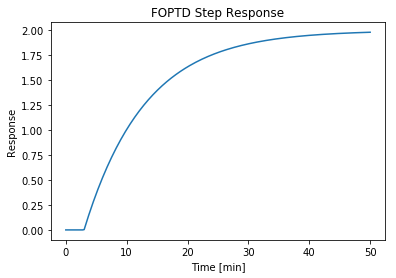

In [ ]:
t = np.linspace(0,50,200)
tau = 10
tau_delay = 3
K = 2

y = foptd(t,K,tau,tau_delay)
plt.plot(t,y)
plt.xlabel('Time [min]')
plt.ylabel('Response')
plt.title('FOPTD Step Response')

## 3.4.4 Fitting an FOPTD model

### 3.4.4.1 Sample Problem Statement

A distillation column is initially at steady state where the cooling water flow to the condensor is 110 kg/hr and the vapor phase mole fraction of the volatile compound is 0.87.  At t = 60 min, the steam flow is raised to 120 kg/hr. The vapor phase mole fraction increases as shown in the following chart. 

The problem task to fit a FOPTD model to this experimental result.

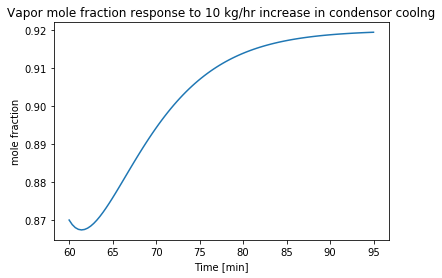

In [ ]:
# create the hypothetical problem data
delta_y,t = control.step(0.05*control.tf([-2, 1],[25, 10, 1]))
y = 0.87 + delta_y
t = t + 60

plt.plot(t,y)
plt.xlabel('Time [min]')
plt.ylabel('mole fraction')
plt.title('Vapor mole fraction response to 10 kg/hr increase in condensor coolng')

### 3.4.4.2 Step 1. Shift and scale the experimental data to correspond to a unit step input at time t =  0.

The first step is to scale the experimental data to fit the framework of an FOPTD model. This generally involves three steps:

* Shift the time scale to t = 0 corresponds to the start of the experiment.

$$ t_s = t - t_0$$

* Shift the response so y = 0 is the initial steady state
* Rescale the response to a unit change in input

$$ y_s = \frac{y(t) - y_0}{u_\infty - u_0}$$

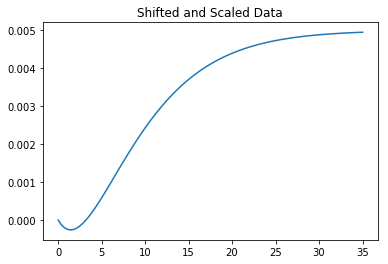

In [ ]:
ts = t - t[0]
ys = (y - y[0])/(120 - 110)

plt.plot(ts, ys)
plt.title('Shifted and Scaled Data')

### 3.4.4.3 Step 2. Create a function to compute the response of an FOPTD model.

For a given list of times $t$ and parameters $K$, $\tau$, and $\tau_d$, the `foptd` returns the response of an FOPTD system to a unit change in input at $t = 0$.

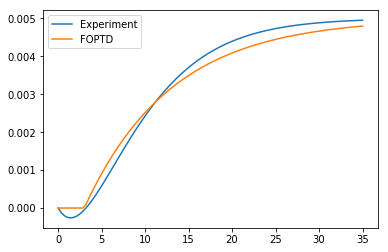

In [ ]:
def foptd(t, K=1, tau=1, tau_d=0):
    tau_d = max(0,tau_d)
    tau = max(0,tau)
    return np.array([K*(1-np.exp(-(t-tau_d)/tau)) if t >= tau_d else 0 for t in t])

z = foptd(ts, 0.005, 10, 3)
plt.plot(ts,ys,ts,z)
plt.legend(['Experiment','FOPTD'])

### 3.4.4.4 Step 3. Create a function to measure the error between an FOPTD model and the experimental data.

Let's called the step response of the fitted model to be $\hat{y}_s$. We seek to minimize

$$\min_{K,\tau,\tau_d} \int_0^T \|\hat{y}_s - y_s\|\,dt$$

for some suitable norm $\|\cdot\|$.  A common choice of norm for process control is the absolute value of the difference called Integral Absolute Error (IAE)

$$\text{IAE} = \min_{K,\tau,\tau_d} \int_0^T |\hat{y}_s - y_s|\,dt$$

The advantage of IAE over other choices of norms is that it tends to be more robust with respect to larger errors.

In [ ]:
def err(X,t,y):
    K,tau,tau_d = X
    z = foptd(t,K,tau,tau_d)
    iae = sum(abs(z-y))*(max(t)-min(t))/len(t)
    return iae

X = [0.005,10,3]
err(X,ts,ys)

0.0077632135835474644

### 3.4.4.5 Step 4. Use scipy.optimize.minimize() to find the best fitting FOPTD model.

In [ ]:
K,tau,tau_d = minimize(err,X,args=(ts,ys)).x

print("K = {:.5f}".format(K))
print("tau = {:.2f}".format(tau))
print("tau_d = {:.2f}".format(tau_d))

K = 0.00512
tau = 8.04
tau_d = 4.61


### 3.4.4.6 Step 5. Rescale FOPTD output and compare to experimental data.

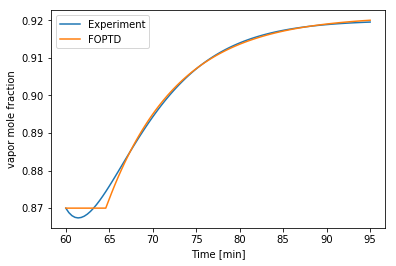

In [ ]:
z = foptd(ts,K,tau,tau_d)
ypred = y[0] + z*(120 - 110)

plt.plot(t,y,t,ypred)
plt.xlabel('Time [min]')
plt.ylabel('vapor mole fraction')
plt.legend(['Experiment','FOPTD'])

# 3.5 One Compartment Pharmacokinetics

## 3.5.1 Summary

Pharmacokinetics is a branch of pharmacology that studies the fate of chemical species in living organisms. The diverse range of applications includes the administration of drugs and anesthesia in humans. This notebook introduces a one compartment model for pharmacokinetics, and shows how it can be used to determine strategies for the intravenous administration of an antibiotic.

The notebook demonstrates the simulation and analysis of systems modeled by a single first-order linear differential equation.

## 3.5.2 Antibiotics

Let's consider the administration of an antibiotic to a patient. Concentration $C$ refers to the concentration of the antibiotic in blood plasma with units [mg/liter]. 

**Minimum Inhibitory Concentration (MIC)** The minimum concentration of the antibiotic that prevents growth of a particular bacterium.

**Minimum Bactricidal Concentration (MBC)** The lowest concentration of the antibiotic that kills a particular bacterium.

Extended exposure to an antibiotic at levels below MBC leads to [antibiotic resistance](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4378521/).

## 3.5.3 Model Description

A simple pharmacokinetic model has the same form as a model for the dilution of a chemical species in a constant volume stirred-tank mixer.  For a stirred-tank reactor with constant volume $V$, volumetric outlet flowrate $Q$, and inlet mass flow $u(t)$,

$$V \frac{dC}{dt} = u(t) - Q C(t)$$

where $C$ is concentration in units of mass per unit volume. In this pharacokinetics application, $V$ refers to blood plasma volume, and $Q$ to the clearance rate.

## 3.5.4 Problem Statement 1

The minimum inhibitory concentration (MIC) of a particular organism to a particular antibiotic is 5 mg/liter, the minimum bactricidal concentration (MBC) is 8 mg/liter. Assume the plasma volume $V$ is 4 liters with a clearance rate $Q$ of 0.5 liters/hour. 

An initial intravenous antibiotic dose of 64 mg results in an initial plasma concentration $C_{initial}$ of 64mg/4 liters = 16 mg/liter.  How long will the concentration stay above MBC?  Above MIC?

## 3.5.5 Solution Strategy 1: Simulation from a Known Initial Condition

For this first simulation we compute the response of the one compartment model due starting with an initial condition $C_{initial}$, and assuming input $u(t) = 0$.  

### 3.5.5.1 Step 1. Initialization

Generally the first steps in any Jupyter notebook are to 

1. Initialize the plotting system.
2. Import the `numpy` library for basic mathematical functions.
3. Import the `matplotlib.pyplot` library for plotting.

In addition, for this application we also import `odeint` function for solving differential equations from the `scipy.integrate` library.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### 3.5.5.2 Step 2. Enter Parameter Values

In [ ]:
V = 4          # liters
Q = 0.5        # liters/hour
MIC = 5        # mg/liter
MBC = 8        # mg/liter

Cinitial = 16  # mg/liter

### 3.5.5.3 Step 3. A Function the RHS of the Differential equation

$$\frac{dC}{dt} = \frac{1}{V}u(t) - \frac{Q}{V}C$$

where $u(t) = 0$.

In [ ]:
def u(t):
    return 0

def deriv(C,t):
    return u(t)/V - (Q/V)*C

### 3.5.5.4 Step 4. Solution and Visualization

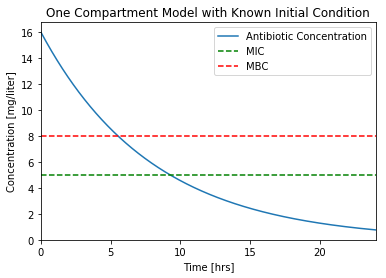

In [ ]:
t = np.linspace(0,24,1000)
C = odeint(deriv, Cinitial, t)

def plotConcentration(t,C):
    plt.plot(t,C)
    plt.xlim(0,max(t))
    plt.plot(plt.xlim(),[MIC,MIC],'g--',plt.xlim(),[MBC,MBC],'r--')
    plt.legend(['Antibiotic Concentration','MIC','MBC'])
    plt.xlabel('Time [hrs]')
    plt.ylabel('Concentration [mg/liter]')
    plt.title('One Compartment Model with Known Initial Condition');
    
plotConcentration(t,C)
plt.savefig('./figures/Pharmaockinetics1.png')

### 3.5.5.5 Step 5. Analysis of the Results

Let's compare our results to a typical experimental result. 

| | |
| :-: | :-: |
|![](./figures/Pharmaockinetics1.png)|![](figures/nihms-475924-f0001.jpg)|

We see that that the assumption of a fixed initial condition is questionable. Can we fix this?

[Levison, Matthew E., and Julie H. Levison. “Pharmacokinetics and Pharmacodynamics of Antibacterial Agents.” Infectious disease clinics of North America 23.4 (2009): 791–vii. PMC. Web. 8 May 2017.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3675903/)

## 3.5.6 Solution Strategy 2: Time-Dependent Input

For the next simulation we will assume the dosing takes place over a short period of time $\delta t$. To obtain a total dose $U_{dose}$ in a time period $\delta t$, the mass flow rate rate must be

$$u(t) = 
\begin{cases}
U/ \delta t \qquad \mbox{for } 0 \leq t \leq \delta t \\
0 \qquad \mbox{for } t \geq \delta t
\end{cases}
$$

Before doing a simulation, we will write a Python function for $u(t)$. 

In [ ]:
# parameter values
dt = 1.5         # length hours
Udose = 64       # mg

# function defintion
def u(t):
    if t <= dt:
        return Udose/dt
    else:
        return 0

This code cell demonstrates the use of a list comprehension to apply a function to each value in a list.

Text(0.5,1,'Dosing function u(t) for of total dose 64 mg')

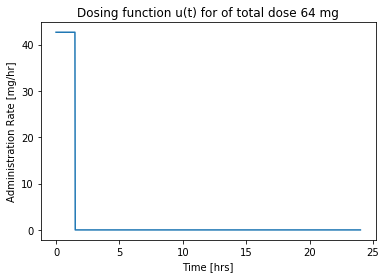

In [ ]:
# visualization
t = np.linspace(0,24,1000)    # create a list of time steps
y = [u(tau) for tau in t]         # list comprehension
plt.plot(t,y)
plt.xlabel('Time [hrs]')
plt.ylabel('Administration Rate [mg/hr]')
plt.title('Dosing function u(t) for of total dose {0} mg'.format(Udose))

Simulation

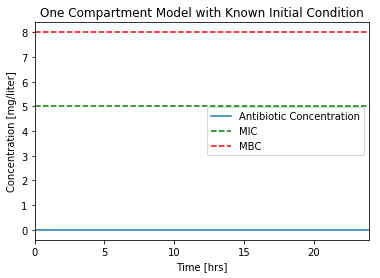

In [ ]:
Cinitial = 0
t = np.linspace(0,24,1000)
C = odeint(deriv, Cinitial, t)

plotConcentration(t,C)
plt.savefig('./figures/Pharmaockinetics2.png')

### 3.5.6.1 Analysis of the Results

Let's compare our results to a typical experimental result. 

| | |
| :-: | :-: |
|![](./figures/Pharmaockinetics2.png)|![](./figures/nihms-475924-f0001.jpg)|

While it isn't perfect, this is a closer facsimile of actual physiological response.

[Levison, Matthew E., and Julie H. Levison. “Pharmacokinetics and Pharmacodynamics of Antibacterial Agents.” Infectious disease clinics of North America 23.4 (2009): 791–vii. PMC. Web. 8 May 2017.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3675903/)

## 3.5.7 Problem Statement 2

The minimum inhibitory concentration (MIC) of a particular organism to a particular antibiotic is 5 mg/liter, the minimum bactricidal concentration (MBC) is 8 mg/liter. Assume the plasma volume $V$ is 4 liters with a clearance rate $Q$ of 0.5 liters/hour. 

Design an antibiotic therapy to keep the plasma concentration above the MIC level for a period of 96 hours. 

## 3.5.8 Solution Strategy 3: Periodic Dosing

Finally, we'll consider the case of repetitive dosing where a new dose is administered every $t_{dose}$ hours. The trick to this calculation is the Python `%` operator which returns the remainder following division. This is a very useful tool for creating complex repetitive functions.

In [ ]:
# parameter values
td = 2           # length of administration for a single dose
tdose = 8        # time between doses
Udose = 42       # mg

# function defintion
def u(t):
    if t % tdose <= dt:
        return Udose/td
    else:
        return 0

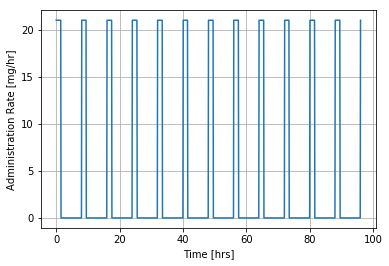

In [ ]:
# visualization
t = np.linspace(0,96,1000)    # create a list of time steps
y = [u(t) for t in t]         # list comprehension

plt.plot(t,y)
plt.xlabel('Time [hrs]')
plt.ylabel('Administration Rate [mg/hr]')
plt.grid()

The dosing function $u(t)$ is now applied to the simulation of drug concentration in the blood plasma. A fourth argument is added to `odeint(deriv, Cinitial, t, tcrit=t)` indicating that special care must be used for every time step. This is needed in order to get a high fidelity simulation that accounts for the rapidly varying values of $u(t)$.

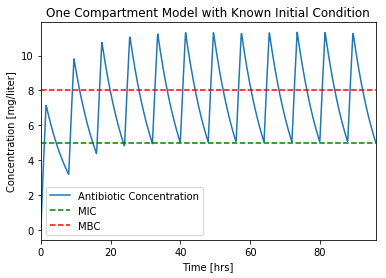

In [ ]:
Cinitial = 0
t = np.linspace(0,96,1000)
C = odeint(deriv, Cinitial, t, tcrit=t)
plotConcentration(t,C)

# 3.5 Exercise 1

The purpose of the dosing regime is to maintain the plasma concentration above the MIC level for at least 96 hours. Assuming that each dose is 64 mg, modify the simulation and find a value of $t_{dose}$ that results satisfies the MIC objective for a 96 hour period.  Show a plot concentration versus time, and include Python code to compute the total amount of antibiotic administered for the whole treatment.

# 3.5 Exercise 2

Consider a continous antibiotic injection at a constant rate designed to maintain the plasma concentration at minimum bactricidal level. Your solution should proceed in three steps:

1. First, by hand, set up and solve the steady state equation to find the desired constant dosage rate. 
2. Modify the Python function for $u(t)$ to simulate the desired flowrate.
3. Verify your result by repeating the above simulation using your function for $u(t)$. 

# 3.6 Second Order Models

A standard form for a generic second-order model for a stable linear system is given  by

$$\tau^2\frac{d^2y}{dt^2} + 2\zeta\tau\frac{dy}{dt} + y = K u$$

where $y$ and $u$ are **deviation variables**.  The parameters have a generic interpretation that are commonly used to describe the qualitative characteristics of these systems.

| Parameter | Units | Description |
| :-: | :-: | :-: |
| $K$ | $\frac{\mbox{units of } y}{\mbox{units of }u}$ | Steady State Gain |
| $\tau \gt 0$ | time | Time Constant |
| $\zeta \geq 0$ | dimensionless | Damping Factor |

The standard form assumes that a zero input (i.e, $u(t) = 0$) results in a zero response ($y(t) = 0$). In practice, the nominal or quiescent value of $y$ or $u$ may different from zero. In that case we would write

$$\tau^2\frac{d^2y}{dt^2} + 2\zeta\tau\frac{dy}{dt} + y - y_{ref} = K\left(u(t) - u_{ref}\right)$$

where $u_{ref}$ and $y_{ref}$ represent constant reference values.

## 3.6.1 Step Response

The step response corresponds to a system that is initially at steady-state where $u = u_{ref}$ and $y = y_{ref}$.  At time $t=0$ the input is incremented by a constant value U, i.e. $u = u_{ref} + U$ for $t \geq 0$.  The subsequent response $y(t) - y_{ref}$ is the **step response**.

Second order linear systems have elegant analytical solutions expressed using exponential and trignometric functions. There are four distinct cases that depend on the value of the damping factor $\zeta$:

* Overdamped
* Critically damped
* Underdamped
* Undamped Oscillations

### 3.6.1.1 Overdamped ($\zeta > 1$)

An overdamped response tends to be sluggish, and with a potentially a large difference in time scales $\tau_1$ and $\tau_2$. The geometric mean of $\tau_1$ and $\tau_2$ is $\tau$.  The value of $\zeta$ determines the differences.

$$y(t) = y_{ref} + KU\left(1 - \frac{\tau_1e^{-t/\tau_1} - \tau_2e^{-t/\tau_2}}{\tau_1 - \tau_2}\right)$$

where $\tau_1$ and $\tau_2$ are found by factor the polynomial

$$\tau^2s^2 + 2\zeta\tau s + 1 = (\tau_1s + 1)(\tau_2s + 1)$$

For $\zeta \geq 1$ the solutions are given by

\begin{align}
\tau_1 & = \frac{\tau}{\zeta - \sqrt{\zeta^2-1}} \\
\tau_2 & = \frac{\tau}{\zeta + \sqrt{\zeta^2-1}}
\end{align}



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [ ]:
def overdamped(K, tau, zeta):
    t = np.linspace(0,20)
    tau_1 = tau/(zeta - np.sqrt(zeta**2 - 1))
    tau_2 = tau/(zeta + np.sqrt(zeta**2 - 1))

    y = K*(1 - ((tau_1*np.exp(-t/tau_1) - tau_2*np.exp(-t/tau_2))/(tau_1 - tau_2)))
    plt.plot(t,y)
    plt.grid()
    
interact(overdamped, K=(0.5,2), tau=(0.5,2), zeta=(1.01,2));

A Jupyter Widget

### 3.6.1.2 Critically Damped ($\zeta = 1$)

$$y(t) = y_{ref} + KU\left[1 - \left(1 + \frac{t}{\tau}\right)e^{-t/\tau}\right]$$

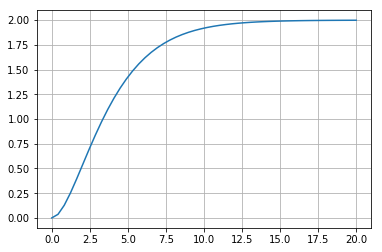

In [ ]:
def criticallydamped(K, tau):
    t = np.linspace(0,20)
    y = K*(1 - (1 + t/tau)*np.exp(-t/tau))
    plt.plot(t,y)
    plt.grid()
    
criticallydamped(K=2, tau=2)

### 3.6.1.3 Underdamped ($0 \lt \zeta \lt 1$)

One version of the solution can be written

$$y(t) = y_{ref} + KU\left(1 - e^{-\zeta t/\tau}\left[\cos\left(\frac{\sqrt{1-\zeta^2}}{\tau}t\right) + \frac{\zeta}{\sqrt{1-\zeta^2}}\sin\left(\frac{\sqrt{1-\zeta^2}}{\tau}t\right)\right] \right)$$

This can be expressed a bit more compactly by introducing a frequency

$$\omega = \frac{\sqrt{1-\zeta^2}}{\tau}$$

which results in

$$y(t) = y_{ref} + KU\left[1 - e^{-\zeta t/\tau}\left(\cos\left(\omega t\right) + \frac{\zeta}{\sqrt{1-\zeta^2}}\,\sin\left(\omega t\right) \right)\right]$$


In [ ]:
def underdamped(K, tau, zeta):
    t = np.linspace(0,20)
    c = np.cos(np.sqrt(1-zeta**2)*t/tau)
    s = np.sin(np.sqrt(1-zeta**2)*t/tau)
    
    y = K*(1 - np.exp(-zeta*t/tau)*(c + zeta*s/np.sqrt(1-zeta**2)))
    plt.plot(t,y)
    plt.grid()
    
interact(underdamped, K=(0.5,3), tau=(0.5,3), zeta=(0,0.999))

A Jupyter Widget

<function __main__.underdamped>

### 3.6.1.4 Undamped ($\zeta = 0$)

Finally, there is the special case of an undamped oscillation

$$y(t) = y_{ref} + KU\left[1 - \cos\left(\omega t\right) \right]$$

where $\omega = 1/\tau$.

## 3.6.2 Simulation

A second-order differential equation can be simulated as a system of two first order differential equations. The key is to introduce a new variable $v = \frac{dy}{dt}$. 

$$\begin{align*}
\frac{dy}{dt} & = v \\
\frac{dv}{dt} & = -\frac{1}{\tau^2}(y-y_{ref}) - \frac{2\zeta}{\tau}v + K\left(u(t)-u_{ref}\right)
\end{align*}$$

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

def simulation(yref=0, U=1, K=1, tau=1, zeta=0.2):

    def deriv(X,t):
        y,v = X
        ydot = v
        vdot = -(y-yref)/tau/tau - 2*zeta*v/tau + K*U/tau/tau
        return[ydot,vdot]

    # simulation  
    t = np.linspace(0,20*tau,1000)
    y = odeint(deriv, [yref,0], t)[:,0]
    
    # plot steady state line and bounds
    plt.figure(figsize=(12,6))

    
    # plot solution
    plt.plot(t,y,lw=3)
    plt.title('Step Response of a Second Order System')
    plt.xlabel('Time')
    plt.ylabel('y')
    
    # plot limits
    plt.ylim(plt.ylim()[0],1.1*plt.ylim()[1])
    plt.xlim(t[0],t[-1])
    dy = np.diff(plt.ylim())
    
    # arrow props
    ap1 = dict(arrowstyle="->")
    ap2 = dict(arrowstyle="<->")

    if zeta < 1:
        #overshoot
        os = np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))
        
        # time to first peak
        tp = np.pi*tau/np.sqrt(1-zeta**2)
        yp = (1+os)*K*U + yref
          
        plt.text(tp,yp+0.02*dy,"Overshoot\n b/a = {0:0.2f}".format(os), ha='center')
        plt.annotate('',xy=(tp,K*U+yref),xytext=(tp,yp),arrowprops=ap2)
        plt.text(tp,(K*U+yref+yp)/2,' b')
        plt.annotate('',xy=(tp,yref),xytext=(tp,K*U+yref),arrowprops=ap2)
        plt.text(tp,K*U/2+yref,' a')
        plt.annotate("Time to first\n peak = {0:.2f}".format(tp),
                    xy=(tp,yref), xytext=(1.2*tp,0.2*K*U+yref),arrowprops=ap1)

        # rise time
        tr = t[np.where(np.diff(np.sign(y-yref-K*U))*np.sign(K*U)>0)[0][0]]
        if tr < plt.xlim()[1]:
            plt.plot([tr,tr],[0.3*K*U+yref,K*U+yref],'r:')
            plt.annotate('',xy=(plt.xlim()[0],0.4*K*U+yref),xytext=(tr,0.4*K*U+yref),
                         arrowprops=ap2)
            plt.text(plt.xlim()[0]+tr/2,0.42*K*U+yref+0.02*dy,
                    'Rise Time\n = {0:.2f}'.format(tr),ha='center')
        
        # period
        P = 2*np.pi*tau/np.sqrt(1-zeta**2)
        if tr + P < plt.xlim()[1]:
            plt.plot([tr,tr],[0.3*K*U+yref,K*U+yref],'r:')
            plt.plot([tr+P,tr+P],[0.3*K*U+yref,K*U+yref],'r:')
            plt.annotate('',xy=(tr,0.4*K*U+yref),xytext=(tr+P,0.4*K*U+yref),arrowprops=ap2)
            plt.text(tr+P/2,0.42*K*U+yref+0.02*dy,'Period = {0:.2f}'.format(P), ha='center')
        
        # second peak
        if tp + P < plt.xlim()[1]:
            plt.annotate('',xy=(tp+P,K*U+yref),xytext=(tp+P,K*U*(1+os**3)+yref),
                        arrowprops=ap2)
            plt.text(tp+P,K*U*(1+os**3/2)+yref,' c')
            plt.text(tp+P,K*U*(1+os**3)+yref+0.02*dy,
                    'Decay Ratio\n c/b = {0:.2f}'.format(os**2),va='bottom',ha='center')
        
        # settling time
        ts = -np.log(0.05)*np.sqrt(1-zeta**2)*tau/zeta
        if ts < plt.xlim()[1]:
            plt.fill_between(t[t>ts],0.95*K*U+yref,1.05*K*U+yref,alpha=0.4,color='y')
            plt.text(ts,1.05*K*U+yref+0.02*dy,
                     'Settling Time\n = {0:.2f}'.format(ts),ha='center')

            
    plt.plot(plt.xlim(),[yref,yref],'k--')
    plt.plot(plt.xlim(),[K*U+yref,K*U+yref],'k--')
    
interact(simulation, yref = (-10,10,0.1), U=(0.01,5,0.01), 
         K = (-5,5,0.01), zeta=(0.01,3,0.01), tau = (0.1,5.0,0.01));

A Jupyter Widget

## 3.6.3 Performance Indicators for Underdamped Systems 

For an underdamped second order system, the desired performance metrics are given by the following by formulas in the following table.

| Quantity           | Symbol | Expression/Value                                       |
| :----------------: | :----: | :----------------------------------------------------: |
| Rise Time          | $t_r$  | Time to first SS crossing                              |
| Time to first peak | $t_p$  | $\frac{\pi\tau}{\sqrt{1-\zeta^2}}$                     |
| Overshoot          | OS     | $\exp\left(-\frac{\pi\zeta}{\sqrt{1-\zeta^2}}\right)$  |
| Decay Ratio        | DR     | $\exp\left(-\frac{2\pi\zeta}{\sqrt{1-\zeta^2}}\right)$ |
| Period             |        | $\frac{2\pi\tau}{\sqrt{1-\zeta^2}}$                    |
| Setting Time       | $t_s$  | Time to +/- 5% of SS                                   |

## 3.6.4 Estimating Parameters for an Underdamped System

### 3.6.4.1 Starting with a Physical Model

A dynamical model for a u-tube manometer is given by

$$\frac{d^2h'}{dt^2} + \frac{6\mu}{R^2\rho}\frac{dh'}{dt} + \frac{3}{2}\frac{g}{L} h' = \frac{3}{4\rho L} p'(t)$$

where $h'$ is the liquid level displacement from an equilibrium position due to a pressure difference $p'(t)$.

| Parameter | Symbol |
| :-: | :-: |
| radius | $R$ |
| liquid length | $L$ |
| gravity | $g$ |
| density | $\rho$ |
| viscosity | $\mu$ |

What is the gain $K$? Time constant $\tau$?  Damping factor $\zeta$? How would choose the radius for the fastest response without overshoot?

### 3.6.4.2 Starting with a Step Response

Underdamped systems have clearly identifiable and measureable characteristics that can be used to identify parameters $K$, $\tau$, and $\zeta$. One procedure, for example, is to execute a step response experiment. Then,

1. Measure overshoot, then estimate damping factor $\zeta$ using a chart of of this equation (or by directly solving the equation for $\zeta$):
$$OS = \frac{a}{b} = \exp\left(\frac{-\pi\zeta}{\sqrt{1-\zeta^2}}\right)$$
2. Measure time-to-first-peak $t_p$. Given $t_p$ and $\zeta$, solve for
$$\tau = \frac{t_p}{\pi}\sqrt{1 - \zeta^2}$$
Alternatively, given period $P$,
$$\tau = \frac{P}{2\pi}\sqrt{1 - \zeta^2}$$


![](2ndOrder.png)

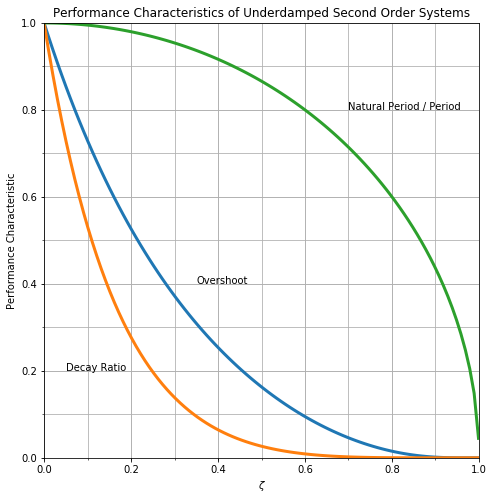

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

zeta = np.linspace(0,0.999,100)
os = np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))
dr = np.exp(-2*np.pi*zeta/np.sqrt(1-zeta**2))
pd = np.sqrt(1-zeta**2)

plt.figure(figsize=(8,8))
plt.plot(zeta, os, lw=3)
plt.plot(zeta, dr, lw=3)
plt.plot(zeta, pd, lw=3)
plt.axis('square')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Performance Characteristics of Underdamped Second Order Systems')
plt.xlabel('$\zeta$')
plt.ylabel('Performance Characteristic')
plt.text(0.35, 0.4, 'Overshoot')
plt.text(0.05, 0.2, 'Decay Ratio')
plt.text(0.70, 0.8, 'Natural Period / Period')
plt.gca().set_xticks(np.arange(0,1,0.1), minor=True)
plt.gca().set_yticks(np.arange(0,1,0.1), minor=True)
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')


# 3.7 Interacting Tanks

## 3.7.1 Problem Statement

The following diagram shows a pair of interacting tanks.

![Image of a two interacting tanks](figures/InteractingTanks.png)

Assume the pressure driven flow into and out of the tanks is linearly proportional to tank levels. The steady state flowrate through the tanks is 3 cubic ft per minute, the steady state heights are 7 and 3 feet, respectively, and a constant cross-sectional area 5 sq. ft. The equations are written as

$$\begin{align*}
\frac{dh_1}{dt} & = \frac{F_0}{A_1} - \frac{\beta_1}{A_1}\left(h_1-h_2\right) \\
\frac{dh_2}{dt} & = \frac{\beta_1}{A_2}\left(h_1-h_2\right) - \frac{\beta_2}{A_2}h_2
\end{align*}$$

**a.** Use the problem data to determine values for all constants in the model equations.

**b.** Construct a Phython simulation using `odeint`, and show a plot of the tank levels as function of time starting with an initial condition $h_1(0)=6$ and $h_2(0)$ = 5. Is this an overdamped or underdamped system.

## 3.7.2 Solution

### 3.7.2.1 Part a. 

The parameters that need to be determined are $\beta_1$ and $\beta_2$. At steady state all of the flows must be identical and

$$\begin{align*}
0 & = F_0 - \beta_1(h_1 - h_2) \\
0 & = \beta_1(h_1 - h_2) - \beta_2h_2 
\end{align*}$$

Substituting problem data,

$$\beta_1 = \frac{F_0}{h_1-h_2} = \frac{3\text{ cu.ft./min}}{4\text{ ft}} = 0.75\text{ sq.ft./min}$$ 

$$\beta_2 = \frac{\beta_1(h_1 - h_2)}{h_2} = \frac{3\text{ cu.ft./min}}{3\text{ ft}} = 1.0\text{ sq.ft./min}$$ 

### 3.7.2.2 Part b.

The next step is perform a simulation from a specified initial condition. 

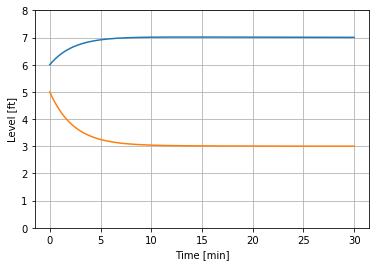

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

# simulation time grid
t = np.linspace(0,30,1000)

# initial condition
IC = [6,5]

# inlet flowrate
F0 = 3

# parameters for tank 1 
A1 = 5
beta1 = 0.75

# parameters for tank 2
A2 = 5
beta2 = 1.0

def hderiv(H,t):
    h1,h2 = H
    h1dot = (F0 - beta1*(h1-h2))/A1
    h2dot = (beta1*(h1-h2) - beta2*h2)/A2
    return [h1dot,h2dot]

sol = odeint(hderiv,IC,t)
plt.plot(t,sol)
plt.ylim(0,8)
plt.grid()
plt.xlabel('Time [min]')
plt.ylabel('Level [ft]')

### 3.7.2.3 Further Calculations

$$\frac{d}{dt}\left[\begin{array}{c} h_1 \\ h_2 \end{array}\right] = 
\left[\begin{array}{cc}-\frac{\beta_1}{A_1} & \frac{\beta_1}{A_1} \\
\frac{\beta_1}{A_2} & -\frac{\beta_1}{A_2} - \frac{\beta_2}{A_2} \end{array}\right]
\left[\begin{array}{c}h_1 \\ h_2\end{array}\right]
+
\left[\begin{array}{c}\frac{1}{A_1} \\ 0\end{array}\right]F_0$$

# 3.7 Interacting Tanks

## 3.7.1 Problem Statement

The following diagram shows a pair of interacting tanks.

![Image of a two interacting tanks](figures/InteractingTanks.png)

Assume the pressure driven flow into and out of the tanks is linearly proportional to tank levels. The steady state flowrate through the tanks is 3 cubic ft per minute, the steady state heights are 7 and 3 feet, respectively, and a constant cross-sectional area 5 sq. ft. The equations are written as

$$\begin{align*}
\frac{dh_1}{dt} & = \frac{F_0}{A_1} - \frac{\beta_1}{A_1}\left(h_1-h_2\right) \\
\frac{dh_2}{dt} & = \frac{\beta_1}{A_2}\left(h_1-h_2\right) - \frac{\beta_2}{A_2}h_2
\end{align*}$$

**a.** Use the problem data to determine values for all constants in the model equations.

**b.** Construct a Phython simulation using `odeint`, and show a plot of the tank levels as function of time starting with an initial condition $h_1(0)=6$ and $h_2(0)$ = 5. Is this an overdamped or underdamped system.

## 3.7.2 Solution

### 3.7.2.1 Part a. 

The parameters that need to be determined are $\beta_1$ and $\beta_2$. At steady state all of the flows must be identical and

$$\begin{align*}
0 & = F_0 - \beta_1(h_1 - h_2) \\
0 & = \beta_1(h_1 - h_2) - \beta_2h_2 
\end{align*}$$

Substituting problem data,

$$\beta_1 = \frac{F_0}{h_1-h_2} = \frac{3\text{ cu.ft./min}}{4\text{ ft}} = 0.75\text{ sq.ft./min}$$ 

$$\beta_2 = \frac{\beta_1(h_1 - h_2)}{h_2} = \frac{3\text{ cu.ft./min}}{3\text{ ft}} = 1.0\text{ sq.ft./min}$$ 

### 3.7.2.2 Part b.

The next step is perform a simulation from a specified initial condition. 

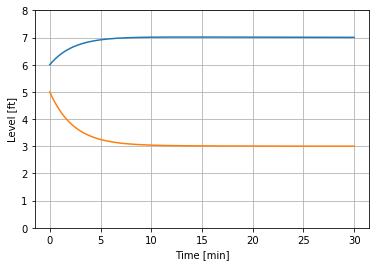

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

# simulation time grid
t = np.linspace(0,30,1000)

# initial condition
IC = [6,5]

# inlet flowrate
F0 = 3

# parameters for tank 1 
A1 = 5
beta1 = 0.75

# parameters for tank 2
A2 = 5
beta2 = 1.0

def hderiv(H,t):
    h1,h2 = H
    h1dot = (F0 - beta1*(h1-h2))/A1
    h2dot = (beta1*(h1-h2) - beta2*h2)/A2
    return [h1dot,h2dot]

sol = odeint(hderiv,IC,t)
plt.plot(t,sol)
plt.ylim(0,8)
plt.grid()
plt.xlabel('Time [min]')
plt.ylabel('Level [ft]')

### 3.7.2.3 Further Calculations

$$\frac{d}{dt}\left[\begin{array}{c} h_1 \\ h_2 \end{array}\right] = 
\left[\begin{array}{cc}-\frac{\beta_1}{A_1} & \frac{\beta_1}{A_1} \\
\frac{\beta_1}{A_2} & -\frac{\beta_1}{A_2} - \frac{\beta_2}{A_2} \end{array}\right]
\left[\begin{array}{c}h_1 \\ h_2\end{array}\right]
+
\left[\begin{array}{c}\frac{1}{A_1} \\ 0\end{array}\right]F_0$$

# 3.8 Manometer Models and Dynamics

## 3.8.1 Summary

This notebook demonstrates the modeling and interactive simulation of a u-tube manometer. This device demonstrates a variety of behaviors exhibited by a linear second order system. An interesting aspect of the problem is the opportunity for passive design of dynamics for a measurement device.

## 3.8.2 Learning Goals

* Develop linear differential equations models for mechanical systems from momentum/force balances. 
* Describe role of position and velocity as state variables in a dynamic model.
* Describe undamped, underdamped, overdamped, and critically damped responses.
* Represent a second order system in standard form with natural frequency and damping factor.
* Describe second order response to sinusoidal input, and resonance.
* Construct a state space representation of a second order linear differential equation.

## 3.8.3 Initializations

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import linalg as la
from ipywidgets import interact,interactive
from control.matlab import *

# scales for all subsequent plots
tmax = 20
ymin = -0.02
ymax = +0.02
axis = [0.0,tmax,ymin,ymax]
t = np.linspace(0.0,tmax,1000)

# physical properties
g = 9.8          # m/s
rho = 1000.0     # density of water kg/m^3
nu = 1.0e-6      # kinematic viscosity of water m/s^2

# system dimensions
L = 7            # meters
d = 0.08         # meters

## 3.8.4 Model 1. Steady State Response to a Pressure Differential

For this first model we will that the ends of the u-tube are exposed to a pressure differential $\Delta P$.  How does the level in the tubes change?

The u-tube manometer of cross-sectional area $A$, filled with a liquid of density $\rho$, the total length of the liquid column $L$. When the ends are open and exposed to the same environmental pressure $P$ the liquid levels in the two the legs of the device will reach the same level. We'll measure the levels in the tubes as a deviation $y$ from this equilibrium position.

At steady state the difference in the levels of the tubes will be $h$. The static pressure difference 

$$\Delta P = \rho g h$$

or 

$$y = \frac{\Delta P}{\rho g}$$

This is simple statics. Notice that neither the cross-sectional area or the length of the liquid column matter.  This is the rationale behind the common water level.

![https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Schlauchwaage_Schematik.svg/250px-Schlauchwaage_Schematik.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Schlauchwaage_Schematik.svg/250px-Schlauchwaage_Schematik.svg.png)

(By [Bd](https://de.wikipedia.org/wiki/User:Bd) at the [German language Wikipedia](https://de.wikipedia.org/wiki/), [CC BY-SA 3.0](http://creativecommons.org/licenses/by-sa/3.0/), [Link](https://commons.wikimedia.org/w/index.php?curid=46342405))

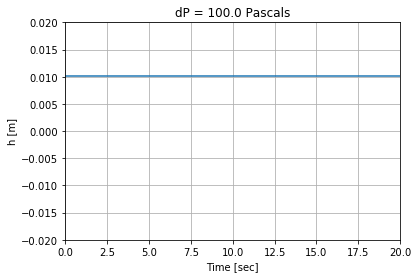

In [ ]:
def model1(deltaP = 100.0):
    h = deltaP/(rho*g)
    plt.axis(axis)
    plt.plot(plt.xlim(),[h,h])
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('h [m]')
    plt.title('dP = {0:5.1f} Pascals'.format(deltaP))

interact(model1,deltaP=(-200,200,20.0));

## 3.8.5 Model 2. Dynamic Response with Negligible Viscosity

The second model for the manometer includes the dynamics associated with moving a mass $m$ of the liquid column held within the manometer. For this model we will chose a different measure of displacem


The net force on the liquid column is due to the applied pressure differential, $A\Delta P$, and the gravitational force due to the difference in liquid levels between the two arms of the manometer, $2 A \rho g$. $A$ is the cross-sectional area. From Newton's law

$$m \frac{d^2y}{dt^2} = A \Delta P - 2 A \rho g y$$

The mass of liquid is $m = \rho L A$ where $L$ is the total length of the liquid column.  After canceling a common factor $A$, the result is an inhomogeneous linear second order differential equation

$$ \frac{d^2y}{dt^2} + \frac{2 g}{L} y = \frac{1}{\rho L} \Delta P$$

At steady state this model reduces to the static case outlined in model 1 above. The dynamic case corresponds to an undamped harmonic oscillator with an angular frequency

$$\omega = \sqrt{\frac{2 g}{L}}$$

For numerical solution using the scipy libraries, it is necessary to convert the second order differential equation to a system of first order differential equations. 

$$\begin{align*}
\frac{dy}{dt} & = v \\
\frac{dv}{dt} & = -\frac{2g}{L} y + \frac{1}{\rho L} \Delta P 
\end{align*}$$

    natural frequency = 1.7 rad/sec
period of oscillation = 3.8 seconds


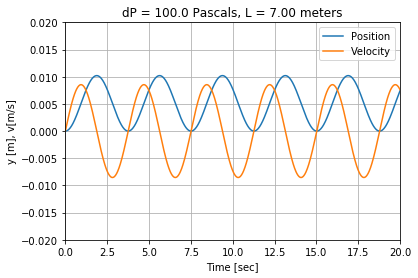

In [ ]:
def model2(deltaP=100, L = 7.0):

    def deriv(X,t):
        x,v = X
        xdot = v
        vdot = -(2*g/L)*x + deltaP/rho/L
        return [xdot,vdot]

    IC = [0,0]
    
    w = np.sqrt(2*g/L)
    print("    natural frequency = {0:0.1f} rad/sec".format(w))
    print("period of oscillation = {0:0.1f} seconds".format(2*np.pi/w))
    
    sol = odeint(deriv,IC,t)
    plt.axis(axis)
    plt.plot(t,sol)
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('y [m], v[m/s]')
    plt.title('dP = {0:5.1f} Pascals, L = {1:4.2f} meters'.format(deltaP,L))
    plt.legend(['Position','Velocity'])
    
interact(model2, deltaP = (-200,200,1), L = (0.2,10,0.1));

## 3.8.6 Model 3. Dynamic Response with Viscous Dissipation

This third model for manometer incorporates the energy loss due to viscous dissipation in fluid motion. The pressure drop due to the laminar flow of incompressible Newtonian fluid in a long pipe with circular cross-section is given by the Hagen-Poiseuille equation

$$\Delta P_{drag} = \frac{32 \mu L v}{d^2}$$

where $\mu$ is the dynamic viscosity and $d$ is pipe diameter. Doing a balance of forces acting on the fluid column

$$\rho AL\frac{d^2y}{dt^2} + \frac{32\mu L A}{d^2}v + 2 A \rho g y = A \Delta P$$

Denoting $\nu = \frac{\mu}{\rho}$ as the kinematic viscosity, substituting for velocity $\frac{dy}{dt} = v$ leaves

$$\frac{d^2y}{dt^2} + \frac{32 \nu }{d^2}\frac{dy}{dt} + \frac{2g}{L} y = \frac{1}{\rho L} \Delta P$$

This can be recast as a pair of first-order linear differential equations

$$\begin{align*}
\frac{dy}{dt} & = v \\
\frac{dv}{dt} & = -\frac{2g}{L} y - \frac{32 \nu }{d^2}v + \frac{1}{\rho L} \Delta P 
\end{align*}$$

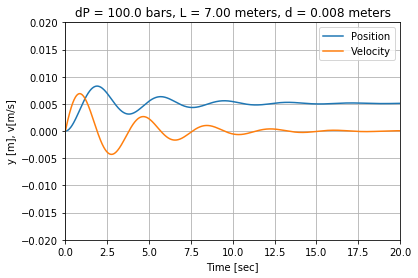

In [ ]:
def model3(dP = 100.0, L = 7.0, d = 0.008):

    def deriv(X,t):
        y,v = X
        ydot = v
        vdot = -(2*g/L)*y - (32*nu/d**2)*v + dP/rho/L
        return [ydot,vdot]

    IC = [0,0]
    sol = odeint(deriv,IC,t)
    plt.axis(axis)
    plt.plot(t,sol)
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('y [m], v[m/s]')
    plt.title('dP = {0:5.1f} bars, L = {1:4.2f} meters, d = {2:5.3f} meters'.format(dP,L,d))
    plt.legend(['Position','Velocity'])

w  = interactive(model3, dP=(-200,200,20), L = (0.2,30,0.1), d=(0.001,0.020,0.001));
w.children[2].readout_format = '.3f'
w

## 3.8.7 Model 4. Second Order System in Standard Form

Standard form of a damped second order system is

$$\tau^2\frac{d^2y}{dt^2} + 2\zeta\tau\frac{dy}{dt} + y = K u(t)$$

Examples include buildings, car suspensions, other structures. Starting with the model equation 

$$\frac{d^2y}{dt^2} + \frac{32 \nu }{d^2}\frac{dy}{dt} + \frac{2g}{L} y = \frac{1}{\rho L} \Delta P$$

The first step is to normalize the zeroth order term in $y$ and compare to the second-order model in standard form

$$\underbrace{\frac{L}{2g}}_{\tau^2}\frac{d^2y}{dt^2} + \underbrace{\frac{16 \nu L}{g d^2}}_{2\zeta\tau}\frac{dy}{dt} + y = \underbrace{\frac{1}{2\rho g}}_K \underbrace{\Delta P}_{u(t)}$$

Solving for the coefficients in standard form

$$\begin{align*}
K & = \frac{1}{2\rho g}\\
\tau & = \sqrt{\frac{L}{2g}} \\
\zeta & = \frac{8\nu}{d^2}\sqrt{\frac{2L}{g}}
\end{align*}$$

#### 3.8.7.1 Undamped ($\zeta = 0$)

#### 3.8.7.2 Underdamped ($\zeta < 1$)

#### 3.8.7.3 Critically damped ($\zeta = 1$)

$$d_\text{critical damping} = \left(\frac{128 \nu^2 L}{g}\right)^\frac{1}{4}$$

#### 3.8.7.4 Overdamped ($\zeta > 1$)

In [ ]:
K = 1/2/rho/g
tau = np.sqrt(L/2/g)
zeta = (8*nu/d**2)*np.sqrt(2*L/g)
print(K,tau,zeta)


dcritical = (128*nu*nu*L/g)**0.25
print(dcritical)

5.10204081632653e-05 0.597614304667 0.00149403576167
0.0030922207027757817


## 3.8.8 Model 5. Dynamic Response to Sinusoidal Input

$$\frac{d^2y}{dt^2} + \frac{32 \nu }{d^2}\frac{dy}{dt} + \frac{2g}{L} y = \frac{1}{\rho L} \Delta P$$

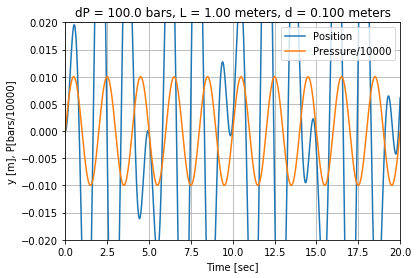

In [ ]:
def model4(dP=100.0, L=1.0, d=0.10, freq=0.5):

    def deriv(X,t):
        x,v = X
        xdot = v
        vdot = -(2*g/L)*x - (32*nu/d**2)*v + dP*np.sin(2.0*np.pi*freq*t)/rho/L
        return [xdot,vdot]

    IC = [0,0]
    sol = odeint(deriv,IC,t)
    plt.axis(axis)
    plt.plot(t,sol[:,1])
    plt.plot(t,dP*np.sin(2.0*np.pi*freq*t)/10000)
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('y [m], P[bars/10000]')
    plt.title('dP = {0:5.1f} bars, L = {1:4.2f} meters, d = {2:5.3f} meters'.format(dP,L,d))
    plt.legend(['Position','Pressure/10000'])

interact(model4, dP=(-200,200,20), L = (0.2,5,0.1), d=(0.01,0.20,0.002), freq=(0,4,0.01));

## 3.8.9 Model 6. State Space Representation

State space models are widely used in textbooks, software, and the research literature to represent linear systems. It's a generic model that represents a system with inputs and outputs. Here's how to recast out manometer model is time-varying pressure as a state model where the liquid level is the measured output.

Start with the model written as a differential equation

$$\frac{d^2y}{dt^2} + \frac{32\nu}{d^2}\frac{dy}{dt} + \frac{2g}{L} y = \frac{1}{\rho L} \Delta P$$

Assemble the dependent variables in a vector, and rewrite using matrix/vector operations.

$$\begin{align*}
\frac{d}{dt}
\left[\begin{array}{c}y \\ v\end{array}\right]
& =
\left[\begin{array}{cc}0 & 1 \\ - \frac{2g}{L} & -\frac{32\nu}{d^2} \end{array}\right]
\left[\begin{array}{c}y \\ v\end{array}\right]
+
\left[\begin{array}{c}0 \\ \frac{1}{\rho L}\end{array}\right]
\left[\Delta P\right] \\
\left[y\right]
& =
\left[\begin{array}{c} 1 & 0\end{array}\right]
\left[\begin{array}{c}y \\ v\end{array}\right]
+
\left[0\right]
\left[\Delta P\right]
\end{align*}
$$

Use standard symbols to label the vectors and matrices.

$$\begin{align*}
\frac{d}{dt}
\underbrace{\left[\begin{array}{c}y \\ v\end{array}\right]}_{x}
& =
\underbrace{\left[\begin{array}{cc}0 & 1 \\ - \frac{2g}{L} & -\frac{32\nu}{d^2} \end{array}\right]}_{A}
\underbrace{\left[\begin{array}{c}y \\ v\end{array}\right]}_{x}
+
\underbrace{\left[\begin{array}{c}0 \\ \frac{1}{\rho L}\end{array}\right]}_{B}
\underbrace{\left[\Delta P\right]}_{u} \\
\underbrace{\left[y\right]}_{y} 
& =
\underbrace{\left[\begin{array}{c} 1 & 0\end{array}\right]}_{C}
\underbrace{\left[\begin{array}{c}y \\ v\end{array}\right]}_{x}
+
\underbrace{\left[0\right]}_{D}
\underbrace{\left[\Delta P\right]}_{u}
\end{align*}
$$

The result is a model of a linear system in a standard state space representation. 

$$\begin{align*}
\frac{dx}{dt} & = Ax + Bu \\
y & = Cx + Du
\end{align*}$$



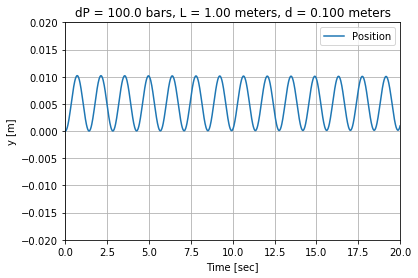

In [ ]:
def model6(dP=100, L=1.0, d=0.10):

    A = [[0,1],[-2*g/L, -32*nu/(d**2)]]
    B = [[0],[1/rho/L]]
    C = [[1,0]]
    D = [[0]]
    
    sys = ss(A,B,C,D)
    y,tout = step(sys,t);

    plt.axis(axis)
    plt.plot(t,dP*y)
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('y [m]')
    plt.title('dP = {0:5.1f} bars, L = {1:4.2f} meters, d = {2:5.3f} meters'.format(dP,L,d))
    plt.legend(['Position'])
    
interact(model6, dP=(-200,200,1), L = (0.2,5,0.1), d=(0.01,0.20,0.002));

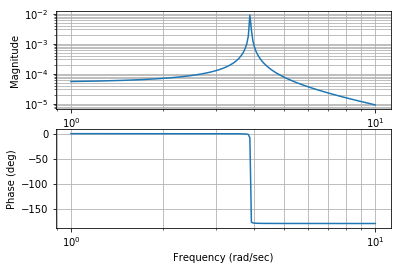

In [ ]:
w = np.logspace(0,1,200)

def model6(L=1.0, d=0.10):

    A = [[0,1],[-2*g/L, -32*nu/(d**2)]]
    B = [[0],[1/rho/L]]
    C = [[1,0]]
    D = [[0]]

    mano = ss(A,B,C,D)
    bode(mano,w);
    
interact(model6, L = (0.2,5,0.1), d=(0.01,0.20,0.002));

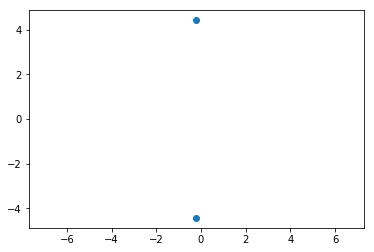

In [ ]:
w = np.logspace(0,1,200)

def model6(L=1.0, d=0.10):

    A = [[0,1],[-2*g/L, -128*nu/(np.pi*d**4)]]
    B = [[0],[1/rho/L]]
    C = [[1,0]]
    D = [[0]]

    e_vals,e_vecs = la.eig(A)
    
    plt.axis([-5,5,-5,5])
    plt.axis('equal')
    plt.plot(e_vals.real,e_vals.imag,'o')
    
    
    
interact(model6, L = (0.2,5,0.1), d=(0.01,0.20,0.002));

# 3.9 Modeling and Control of a Campus Outbreak of Coronavirus COVID-19

This Jupyter/Python notebook presents models for the outbreak of an infectious disease into a susceptible population using standard epidemiological models. Model parameters are taken from a rapidly evolving scientific literature documenting the global COVID-19 outbreak. A control policy based on 'social distancing' is included in the model.

The notebook is organized as follows:

1. Brief Background on the SARS-CoV-2 Coronavirus and COVID-19
2. Model 1. SIR Model for an Infectious Disease
3. Model 2. SEIR Model
4. Model 3. SEIR Model with Control
5. Model 4. An Improved SEIR model.
6. Ideas for student projects.

The executable Python code in this notebook can be edited and run Google's cloud servers by clicking on the "Open in Colab" button located in the header. Use the interactive sliders to adjust model parameters and perform 'what if' simulations.

## 3.9.1 1. Brief background on the SARS-CoV-2 Coronavirus and COVID-19

[COVID-19](https://www.who.int/health-topics/coronavirus) is caused by the human coronavirus SARS-CoV-2. First identified in the 1960's, there are currently four human coronaviruses endemic to populations around the world:

* 229E (alpha coronavirus)
* NL63 (alpha coronavirus)
* OC43 (beta coronavirus)
* HKU1 (beta coronavirus)

These four common coronaviruses cause an upper respiratory disease that can progress to pneumonia. These endemic viruses cause about a quarter of all common colds. Most people will suffer from at least one during their lifetimes.

In recent decades, three additional coronaviruses that normally infect animals have evolved to infect humans. These include:

* MERS-CoV (the beta coronavirus that causes Middle East Respiratory Syndrome, or MERS)
* SARS-CoV (the beta coronavirus that causes severe acute respiratory syndrome, or SARS)
* SARS-CoV-2 (the novel coronavirus that causes coronavirus disease COVID-19)

The last of these, now called SARS-CoV-2, first appeared in December, 2019, at a seafood market in Wuhan (Hubei, China). The rapid spread of SARS-CoV-2 in Wuhan, and subsequent appearance in other locations around the globe, has resulted in declaration of a [global health emergency by the World Health Organization (WHO)](https://www.who.int/emergencies/diseases/novel-coronavirus-2019). Most countries are mobilizing to track the virus and control new outbreaks. At this stage, it is too early to know if efforts to contain the mitigate transmission of the virus will be successful in preventing COVID-19 from becoming a pandemic, or later an endemic disease with a global footprint. 

The latest status on the global outbreak of COVID-19 can be found at the following links:

* [Coronavirus COVID-19 Global Cases by Johns Hopkins CSSE](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)
* [WHO Novel Coronavirus (COVID-19) Situation](https://experience.arcgis.com/experience/685d0ace521648f8a5beeeee1b9125cd)

The purpose of this notebook is to demonstrate the modeling of an infectious epidemic using the latest available data for COVID-19, and to provide a framework for evaluating the performance of 'social distancing' and other mitigation strategies. The models and data used in this notebook have been extracted from a rapidly emerging and changing literature. Recent papers on COVID-19 can be found at the following links.

* [Cell Press Coronavirus Resource Hub](https://www.cell.com/2019-nCOV)
* [Lancet COVID-19 Resource Centre](https://www.thelancet.com/coronavirus)
* [medRxiv preprint server search on COVID-19](https://www.medrxiv.org/search/COVID-19%20numresults%3A50%20sort%3Apublication-date%20direction%3Adescending)
* [New England Journal of Medicine Coverage on Coronavirus (COVID-19)](https://www.nejm.org/coronavirus)
* [WHO Database of publications on coronavirus disease (COVID-19)](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/global-research-on-novel-coronavirus-2019-ncov)

## 3.9.2 Model 1. SIR model for an infectious disease

### 3.9.2.1 Readings

* Keeling, Matt J., and Pejman Rohani. Modeling Infectious Diseases in Humans and Animals. Princeton University Press, 2008. JSTOR, www.jstor.org/stable/j.ctvcm4gk0. Accessed 25 Feb. 2020.
* Boldog, Péter, et al. "Risk Assessment of Novel Coronavirus COVID-19 Outbreaks Outside China." Journal of Clinical Medicine 9.2 (2020): 571. https://www.mdpi.com/2077-0383/9/2/571
* Bedford, Trevor. Cryptic transmission of novel coronavirus revealed by genomic epidemiology. Accessed 4 Mar 2020. https://bedford.io/blog/ncov-cryptic-transmission/

### 3.9.2.2 Introduction to SIR models

The SIR model is deterministic compartment model for the spread of an infectious disease that describes key phenomena encountered in epidemiology. In the SIR model, a population is broken into three non-overlapping groups corresponding to stages of the disease:

* **Susceptible.** The subpopulation susceptible to acquire the disease. For SARS-CoV-2, the assumption is that everyone who has not previously acquired the disease is susceptible to infection.
* **Infectious.** The subpopulation that has become infective.
* **Recovered.** The subpopulation that has recovered from infection, and presumed to be no longer susceiptible to the disease.

Neglecting demographic processes of birth and death from other causes, and assuming a negligible death rate due to infectious disease at issue, the progression of an epidemic can be modeled by rate processesl

$$\text{Susceptible}
\xrightarrow{\frac{\beta S I}{N}} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The rate processes are modeled as follows.

* $\frac{\beta S I}{N}$ is the rate at which susecptible population encounters the infected population resulting in trasmission of the disease. $S$ is the size of the susceptible population. $\beta$ is a the model parameters with units of 1/day. 
* $\gamma I$ is the rate at which infected population recovers and becomes resistent to further infection. $I$ is the size of the infective population.

A model for the spread of an infectious disease in a uniform population is given by the deterministic SIR equations

\begin{align*}
\frac{dS}{dt} & = -\frac{\beta S I}{N} \\
\frac{dI}{dt} & = \frac{\beta S I}{N} - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align*} 

The model becomes more generic by working with population fractions rather than raw population counts. To this end, define

\begin{align}
s = \frac{S}{N} \qquad
i = \frac{I}{N} \qquad
r = \frac{R}{N}
\end{align} 

After substitution, this results in a system of four equations.

\begin{align*}
\frac{ds}{dt} & = -\beta s i \\
\frac{di}{dt} & = \beta s i - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + i + r = 1$ is an invariant.

### 3.9.2.3 Key Properties of the SIR Model

The SIR model describes key epidemiological phenemena. Here is a brief synposis of the relevant results.

* The parameters $\beta$ and $\gamma$ have units of inverse time.  
* $\beta$ is rate constant associated with transmission of the infection. The corresponding time constant $\tau_{infect} = \frac{1}{\beta}$ corresponds to exponential growth of new infections in an initially susceptible population where $s=1$. 
* $\gamma$ is the rate of recovery from infections. The associated time constant $\tau_{recovery}=\frac{1}{\gamma}$ is average time to recover from an infection.
* The infectious population can grown only if $\beta s > \gamma$, that is the rate of infection is greater than the rate of recovery.
* The ratio $R_0 = \frac{\beta}{\gamma}$ is the "Basic Reproduction Number" that describes the transmissability or contagiousness of an infectious disease. 
* $R_0$ is the average number of people infected by an index 0 case in an otherwise completely susceptible population. 
* The infectious population can grow only if $R_0 s > 1$. If $s=1$, then $R_0 > 1$ is sufficient for growth of the infectious population.
* The infectious population decreases if $s R_0 < 1$ or, equivalently, $s < \frac{1}{R_0}$.
* The population has 'herd immunity' when the fraction of susceptibles is less than $\frac{1}{R_0}$.

### 3.9.2.4 Simulation

The following Python code implements a simulation of the SIR model. The parameter values were selected from the recent survey by Boldog, et al. (2020).

* $\tau_{infectious} = \frac{1}{\gamma} = 8.4$ days.
* $R_0 = \frac{\beta}{\gamma} = 2.4$ 

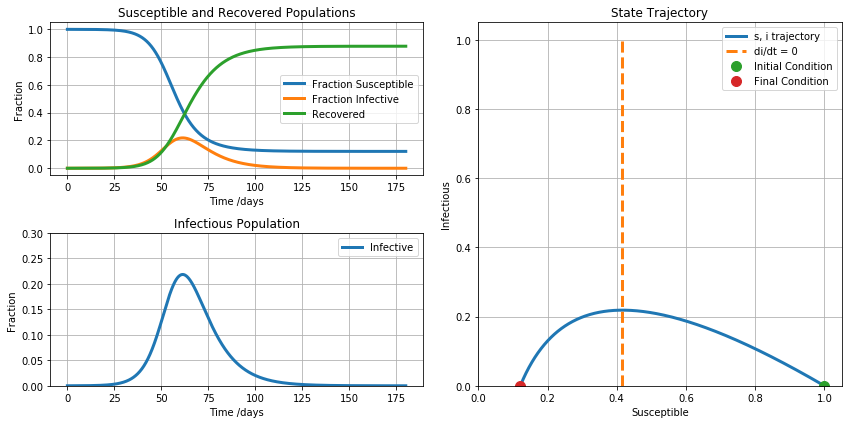

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
R0 = 2.4
t_infective = 5.1 + 3.3

# initial number of infected and recovered individuals
i_initial = 1/20000
r_initial = 0.00
s_initial = 1 - i_initial - r_initial

gamma = 1/t_infective
beta = R0*gamma

# SIR model differential equations.
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

t = np.linspace(0, 180, 2000)
x_initial = s_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(beta, gamma))
s, i, r = soln.T
e = None

def plotdata(t, s, i, e=None):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')

    ax[2].plot(s, i, lw=3, label='s, i trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infectious')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()
    
plotdata(t, s, i)

### 3.9.2.5 How many people will be infected following an outbreak?

Given an outbreak in a susceptible population, the final state is reached when $i$ returns to a near zero value. A formula for the final state can be found by taking the ratio 

\begin{align}
\frac{di}{ds} & = \frac{\frac{di}{dt}}{\frac{ds}{dt}}  =  -1 + \frac{1}{s R_0} & \\
\end{align}

Integrating,

\begin{align}
\int_{i_0}^{i_f} di & =  \int_{s_0}^{s_f} (-1 + \frac{1}{s R_0}) ds & \\
\end{align}


\begin{align}
i_f - i_0 & =  -(s_f - s_0) + \frac{1}{R_0} \ln\frac{s_f}{s_0}  & \\
\end{align}

The starting point of an outbreak begins with a very small value $i_0 \approx 0$ and ends with a very small value $i_f \approx 0$. Setting $i_0 = i_f = 0$ gives

\begin{align}
s_f - \frac{1}{R_0}\ln s_f & = s_0 - \frac{1}{R_0} \ln{s_0}  & \\
\end{align}

For the special case of an initially susceptible population, $s_0 = 1$ which gives 

\begin{align}
s_f - \frac{1}{R_0} \ln s_f & = 1
\end{align}

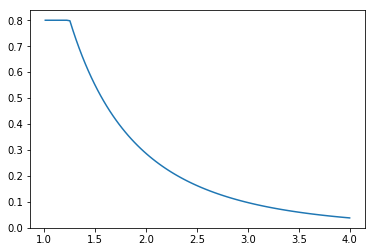

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq, fminbound

def f(s, R0):
    return s - np.log(s)/R0

def g(s0, R0):
    rhs = f(s0, R0)
    smin = fminbound(lambda s: f(s, R0), 0.0001, 1)
    return brentq(lambda s: f(s, R0) - f(s0, R0), 0.001, smin)

R0 = np.linspace(1.01, 4.0, 100)
sf = [g(0.8, R0) for R0 in R0]

plt.plot(R0, sf)


## 3.9.3 Model 2. SEIR model

The SEIR model extends the SIR model by adding an additional population compartment containing those individuals who have been exposed to the virus but not yet infective.

* **Exposed.** The subpopulation that has been exposed to the disease but not yet infective. 

The compartment model can be diagrammed as follows.

$$\text{Susceptible}
\xrightarrow{\frac{\beta S I}{N}} 
\text{Exposed} 
\xrightarrow{\alpha E} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The rate processes are modeled as follows.

* $\frac{\beta S I}{N}$ is the rate at which susecptible population encounters the infected population resulting in trasmission of the disease. $S$ is the size of the susceptible population. $\beta$ is a the model parameters with units of 1/day. 
* $\alpha E$ is the rate at which exposed population becomes infective, where $E$ is the size of the exposed population. The average period of time in the exposed state is the incubation period of the disease, and equal to $\frac{1}{\alpha}$.
* $\gamma I$ is the rate at which infected population recovers and becomes resistent to further infection. $I$ is the size of the infective population.

An elementary model for the spread of an infectious disease in a uniform population is given by the deterministic SEIR equations}

After substitution, this results in a system of four equations.

\begin{align*}
\frac{ds}{dt} & = -\beta s i \\
\frac{de}{dt} & = \beta s i - \alpha e \\
\frac{di}{dt} & = \alpha e  - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + e + i + r = 1$ is an invariant.

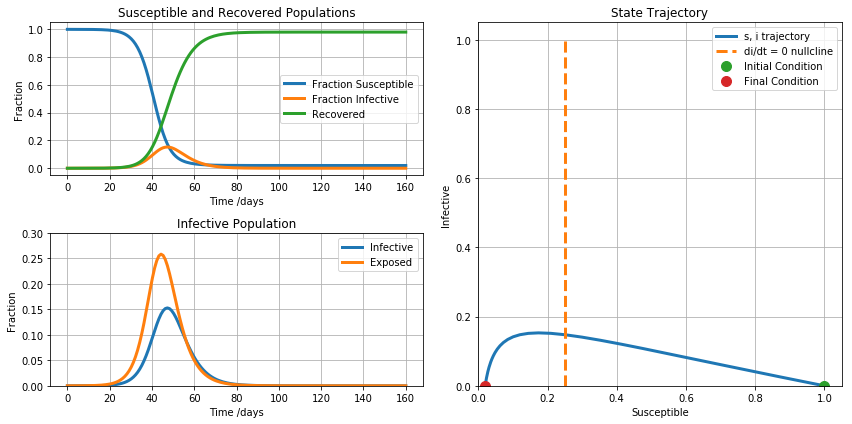

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
R0 = 4
t_incubation = 5.1
t_infective = 3.3

# initial number of infected and recovered individuals
e_initial = 1/20000
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# SEIR model differential equations.
def deriv(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt =  beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 160, 160)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T

plotdata(t, s, i, e)

* The addition of an exposed population compartment slows the outbreak, but doesn't appear to reduce the number of people ultimately infected by the disease.

* What are the campus policy implications of these results?

## 3.9.4 Model 3. Mitigation and Social Distancing

* Pan, Jinhua, et al. "Effectiveness of control strategies for Coronavirus Disease 2019: a SEIR dynamic modeling study." medRxiv (2020). https://www.medrxiv.org/content/10.1101/2020.02.19.20025387v3.full.pdf

The lack of a vaccine reduces the options for controlling the COVID-19 outbreak. Current efforts are focused on 'social distancing' designed to reduce transmission of the virus from individuals in the infective state to susceptible individuals.

For the purposes of modeling, we introduce a control parameter $u$ indicating the effectiveness of these efforts. $u=0$ corresponds to no controls, $u=1$ corresponds to perfect isolation of infective individuals. The purpose of this model is to explore how a social distancing stragtegy affects the outcome of an epidemic.

* **Exposed.** The subpopulation that has been exposed to the disease but not yet infective. 

The compartment model can be diagrammed as follows.

$$\text{Susceptible}
\xrightarrow{(1-u)\frac{\beta S I}{N}} 
\text{Exposed} 
\xrightarrow{\alpha E} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The rate processes are modeled as follows.

* $(1-u)\frac{\beta S I}{N}$ is the rate at which susecptible population encounters the infected population resulting in trasmission of the disease. $u$ describes the effectiveness on any public health interventions to control transmission of the disease. $u=0$ means no effective public health interventions, $u=1$ means total elimination of disease transmission..

After substitution, this results in a system of four equations.

\begin{align*}
\frac{ds}{dt} & = -(1-u)\beta s i \\
\frac{de}{dt} & = (1-u)\beta s i - \alpha e \\
\frac{di}{dt} & = \alpha e  - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + e + i + r = 1$ is an invariant.

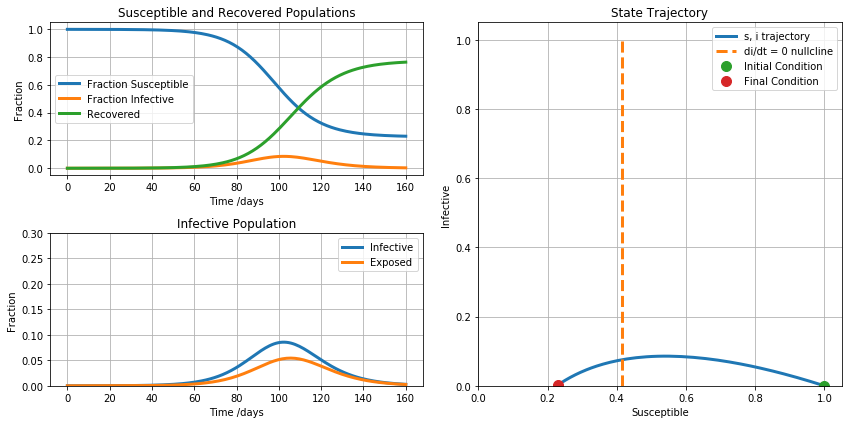

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
u = 0.2
R0 = 2.4
t_incubation = 5.1
t_infective = 3.3

# initial number of infected and recovered individuals
e_initial = 1/20000
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# SEIR model differential equations.
def deriv(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -(1-u)*beta * s * i
    dedt =  (1-u)*beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 160, 160)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T

plotdata(t, s, e, i)

Social distancing has several beneficial effects:

* Slows down the progress of the epidemic.
* Seduces the fraction of the population infected at any point in time, thereby reducing strain on health care resources.
* Reduces the number of individuals ultimately experiencing the disease. For a disease with a non-zero mortaility, this saves lives.

### 3.9.4.1 Social Distancing Strategies for the Campus

The basic strategy is to slow transmission through 'social distancing' with the following goals:
* Reduce the number of individuals acquiring the virus.
* Slowing progress of any outbreak long enough to complete the semester.

[CDC Social Distancing](https://www.cdc.gov/coronavirus/2019-ncov/community/guidance-ihe-response.html)

* Replace large section courses with streaming lectures. Close the largest lecture halls for the remainder of the term.
* Bring food to the dorms rather than the dorms to food.
* Locate an area to isolate and quarantine students with potential infectious state.
* Hold Saturday classes, move graduation up one week.


## 3.9.5 Model 4. Improving the fidelity of the model.

Boldog, et al.

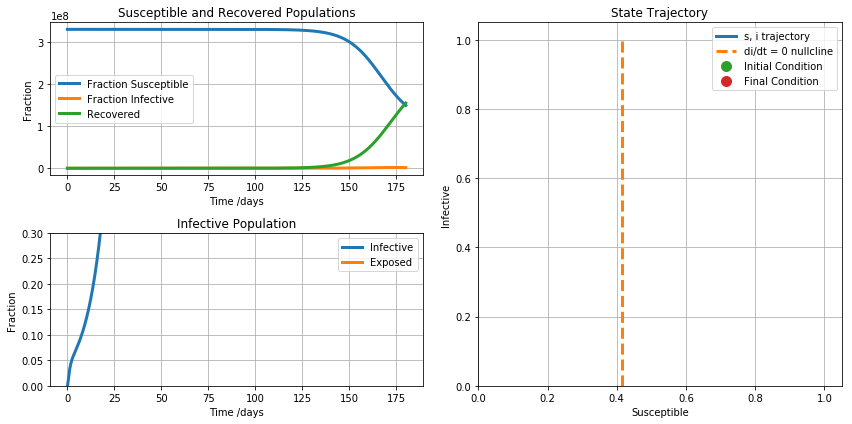

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

u = 0.3
mu = 0
alpha = 1/5.1   # incubation period
R0 = 2.4
gamma = 3.3
beta = R0*gamma

N = 331000000

def SEIR(x, t):
    S, E1, E2, I1, I2, I3, R = x
    dS = -(1-u)*beta*S*(I1 + I2 + I3)/N
    dE1 = -dS - 2*alpha*E1
    dE2 = 2*alpha*E1 - 2*alpha*E2
    dI1 = 2*alpha*E2 - 3*gamma*I1 - mu*I1
    dI2 = 3*gamma*I1 - 3*gamma*I2 - mu*I2
    dI3 = 3*gamma*I2 - 3*gamma*I3 - mu*I3
    dR = 3*gamma*I3
    return [dS, dE1, dE2, dI1, dI2, dI3, dR]


IC = [N, 1, 0, 0, 0, 0, 0]
t = np.linspace(0, 180, 1000)


soln = odeint(SEIR, IC, t)

s = soln[:, 0]
e = soln[:, 1] + soln[:, 2]
i = soln[:, 3] + soln[:, 4] + soln[:, 5]
r = soln[:, 6]

plotdata(t, s, i, e)

## 3.9.6 Additional Modeling Opportunities. Transportation, power law kinetics, etc.

* Ziff, Robert M., and Anna L. Ziff. "Fractal kinetics of COVID-19 pandemic." medRxiv (2020). https://www.medrxiv.org/content/10.1101/2020.02.16.20023820v1

* Peng, Liangrong, et al. "Epidemic analysis of COVID-19 in China by dynamical modeling." arXiv preprint arXiv:2002.06563 (2020).  https://arxiv.org/abs/2002.06563

* Wu, Joseph T., Kathy Leung, and Gabriel M. Leung. "Nowcasting and forecasting the potential domestic and international spread of the 2019-nCoV outbreak originating in Wuhan, China: a modelling study." The Lancet (2020). https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext

* Tuite, Ashleigh R., and David N. Fisman. "Reporting, Epidemic Growth, and Reproduction Numbers for the 2019 Novel Coronavirus (2019-nCoV) Epidemic." Annals of Internal Medicine (2020). https://annals.org/aim/fullarticle/2760912